In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
zips = gpd.read_file('D:/Shantanu/NYU CUSP/PUI/midterm-shantanu1000-main/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [3]:
df = pd.read_csv('project-sunroof-postal_code.csv')

In [4]:
df.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,12210,New York,42.670146,42.648346,-73.747372,-73.768631,42.656878,-73.759919,961.35,1969.0,...,4.109930e+05,2.373516e+06,2.534450e+06,7.508317e+05,2.452771e+07,7305.194678,3.059750e+07,"[[0,610],[5,899],[10,223],[15,75],[20,31],[25,...",11180.899845,1.0
1,12211,New York,42.756115,42.671905,-73.721030,-73.830649,42.706435,-73.765975,961.35,3633.0,...,1.021738e+06,2.106293e+07,1.132311e+07,1.229446e+07,2.472480e+07,11021.458698,7.042704e+07,"[[0,582],[5,1211],[10,1023],[15,431],[20,183],...",25735.357620,17.0
2,12222,New York,42.691756,42.688628,-73.827249,-73.830098,42.690409,-73.828811,961.35,30.0,...,3.440671e+04,4.849979e+05,4.800721e+05,7.025353e+04,1.109636e+05,36431.040363,1.180694e+06,"[[0,1],[5,1],[15,1],[20,2],[25,8],[30,15],[65,...",431.447609,0.0
3,12235,New York,42.738615,42.738458,-73.820816,-73.820885,42.738536,-73.820850,961.35,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.558662e+04,35586.624609,3.558662e+04,"[[30,1]]",13.004019,0.0
4,12246,New York,42.647312,42.646912,-73.749521,-73.749785,42.647112,-73.749653,961.35,2.0,...,0.000000e+00,1.831440e+03,0.000000e+00,0.000000e+00,3.329192e+04,5495.239624,3.512336e+04,"[[5,1],[25,1]]",12.834735,0.0


In [5]:
df.nunique()

region_name                             11512
state_name                                 69
lat_max                                 11511
lat_min                                 11511
lng_max                                 11470
lng_min                                 11459
lat_avg                                 11512
lng_avg                                 11512
yearly_sunlight_kwh_kw_threshold_avg     1869
count_qualified                          6880
percent_covered                         10654
percent_qualified                       10119
number_of_panels_n                       8926
number_of_panels_s                      10415
number_of_panels_e                      10138
number_of_panels_w                      10230
number_of_panels_f                      10829
number_of_panels_median                   584
number_of_panels_total                  11260
kw_median                                 584
kw_total                                11260
yearly_sunlight_kwh_n             

In [6]:
df.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

In [7]:
df = pd.read_csv('project-sunroof-postal_code.csv')
df = df[(df['region_name']>=10001) & (df['region_name']<=11700)]
df.shape

(361, 31)

In [8]:
df = df[['region_name', 'lat_avg', 'lng_avg', 'kw_total']]
df.head()

,region_name,lat_avg,lng_avg,kw_total
11001,10001,40.749149,-73.994361,14787.50
11002,10002,40.716969,-73.989529,28102.50
11003,10003,40.731286,-73.988303,18188.00
11004,10004,40.702853,-74.014737,4690.25
11005,10005,40.706196,-74.008946,2027.25


In [9]:
df['ZIP'] = df['region_name']
df.drop(['region_name'], axis=1, inplace=True)
df.head()

,lat_avg,lng_avg,kw_total,ZIP
11001,40.749149,-73.994361,14787.50,10001
11002,40.716969,-73.989529,28102.50,10002
11003,40.731286,-73.988303,18188.00,10003
11004,40.702853,-74.014737,4690.25,10004
11005,40.706196,-74.008946,2027.25,10005


In [10]:
df['kw_potential'] = df['kw_total']
df.drop('kw_total', axis=1, inplace=True)
df.head()

,lat_avg,lng_avg,ZIP,kw_potential
11001,40.749149,-73.994361,10001,14787.50
11002,40.716969,-73.989529,10002,28102.50
11003,40.731286,-73.988303,10003,18188.00
11004,40.702853,-74.014737,10004,4690.25
11005,40.706196,-74.008946,10005,2027.25


In [11]:
zips = gpd.read_file('D:/Shantanu/NYU CUSP/PUI/midterm-shantanu1000-main/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [12]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df.lng_avg, df.lat_avg)]

geoDF = gpd.GeoDataFrame(df,geometry=geometry,crs={'init': 'epsg:4326'})

zips1 = zips
zips.crs

C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
DF_SOLAR = gpd.sjoin(geoDF.to_crs({'init' : 'epsg:2263'}), zips1, op = 'within', how = 'right')
DF_SOLAR.shape

C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


(291, 18)

In [18]:
DF_SOLAR.head()

,index_left,lat_avg,lng_avg,ZIP,kw_potential,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11316.0,40.676438,-73.796217,11436.0,18331.00,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11237.0,40.671079,-73.937078,11213.0,42494.25,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11236.0,40.662170,-73.915008,11212.0,64750.50,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11249.0,40.662356,-73.952847,11225.0,35207.25,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11242.0,40.643419,-73.977848,11218.0,76618.25,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [15]:
zips.dtypes

ZIPCODE         object
BLDGZIP         object
PO_NAME         object
POPULATION     float64
AREA           float64
STATE           object
COUNTY          object
ST_FIPS         object
CTY_FIPS        object
URL             object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

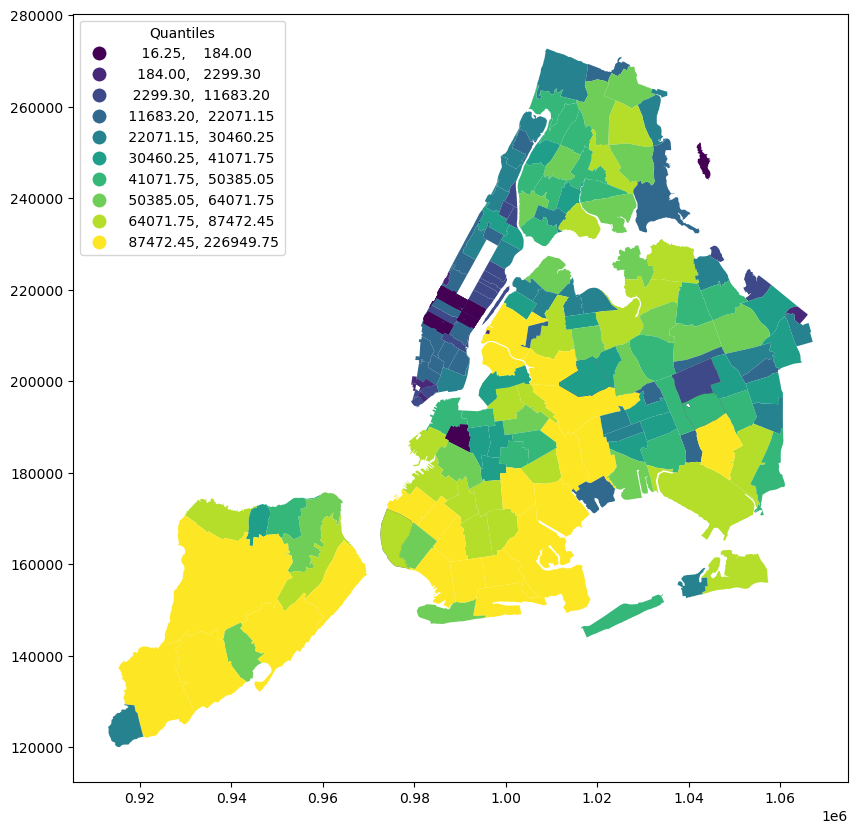

In [21]:
fig, ax = plt.subplots(1, figsize=(10,10))

DF_SOLAR.plot(ax=ax, column='kw_potential', k=10, scheme='Quantiles', legend=True,
              legend_kwds={'loc': 'upper left', 'title': 'Quantiles'})

plt.show()

In [22]:
DF_SOLAR_final = DF_SOLAR[['ZIPCODE','kw_potential']]

In [23]:
DF_SOLAR_final.to_csv('Solarpotential.csv', index = False)